In [33]:
import pandas as pd

## 서울시 CCTV 정보 불러오기

In [34]:
cctv_seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", index_col=0)
cctv_seoul.head()

,구분,총계,2015년 이전\n설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
NaN,계,"99,515","8,759","5,725","8,537","10,770","10,619","12,855","11,525","9,358","9,379","11,988"
1.0,종로구,"2,031",549,158,128,143,142,67,237,82,225,300
2.0,중 구,"2,718",275,236,239,372,386,155,364,419,137,135
3.0,용산구,"3,258",88,38,295,491,147,335,473,486,500,405
4.0,성동구,"4,409",190,352,278,939,457,640,483,366,233,471


## 서울시 CCTV 정보 인덱스 정수로 reset

In [35]:
cctv_seoul.reset_index(drop=True, inplace=True)
cctv_seoul.head()

,구분,총계,2015년 이전\n설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,계,"99,515","8,759","5,725","8,537","10,770","10,619","12,855","11,525","9,358","9,379","11,988"
1,종로구,"2,031",549,158,128,143,142,67,237,82,225,300
2,중 구,"2,718",275,236,239,372,386,155,364,419,137,135
3,용산구,"3,258",88,38,295,491,147,335,473,486,500,405
4,성동구,"4,409",190,352,278,939,457,640,483,366,233,471


## 서울시 CCTV 정보 필요없는 정보('계' 행) 제거

In [36]:
cctv_seoul.drop([0], inplace=True)
cctv_seoul.head()

,구분,총계,2015년 이전\n설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
1,종로구,"2,031",549,158,128,143,142,67,237,82,225,300
2,중 구,"2,718",275,236,239,372,386,155,364,419,137,135
3,용산구,"3,258",88,38,295,491,147,335,473,486,500,405
4,성동구,"4,409",190,352,278,939,457,640,483,366,233,471
5,광진구,"3,828",309,95,42,666,460,712,191,740,273,340


* drop : 기존 인덱스 열 삭제 여부
* inplace : 수정된 내용을 원본에 반영할지 말지 여부

In [37]:
cctv_seoul.reset_index(drop=True, inplace=True)
cctv_seoul.head()

,구분,총계,2015년 이전\n설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,"2,031",549,158,128,143,142,67,237,82,225,300
1,중 구,"2,718",275,236,239,372,386,155,364,419,137,135
2,용산구,"3,258",88,38,295,491,147,335,473,486,500,405
3,성동구,"4,409",190,352,278,939,457,640,483,366,233,471
4,광진구,"3,828",309,95,42,666,460,712,191,740,273,340


## 서울시 CCTV 정보 열 정보 확인 및 수정

In [38]:
cctv_seoul.columns

Index(['구분', '총계', '2015년 이전\n설치된 CCTV', '2015년', '2016년', '2017년', '2018년',
       '2019년', '2020년', '2021년', '2022년', '2023년'],
      dtype='object')

In [39]:
cctv_seoul.columns[0]

'구분'

In [40]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별', cctv_seoul.columns[2]:'2015년 이전'}, inplace=True)
cctv_seoul.head()

,구별,총계,2015년 이전,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,"2,031",549,158,128,143,142,67,237,82,225,300
1,중 구,"2,718",275,236,239,372,386,155,364,419,137,135
2,용산구,"3,258",88,38,295,491,147,335,473,486,500,405
3,성동구,"4,409",190,352,278,939,457,640,483,366,233,471
4,광진구,"3,828",309,95,42,666,460,712,191,740,273,340


## 서울시 인구 정보 불러오기 및 열 정보 수정

In [41]:
pop_seoul = pd.read_excel('../data/01. Seoul_Population.xlsx',
                          header=2, usecols="B,D,G,J,N")
pop_seoul.head()

/home/kth/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,동별(2),소계.1,소계.2,소계.3,소계.5
0,소계,9638799,9386034,252765,1743696
1,종로구,150453,139417,11036,28764
2,중구,131793,121312,10481,25920
3,용산구,227106,213151,13955,39747
4,성동구,284766,277361,7405,49462


In [42]:
pop_seoul.columns = ["구별", "인구수", "한국인", "외국인", "고령자"]
pop_seoul

,구별,인구수,한국인,외국인,고령자
0,소계,9638799,9386034,252765,1743696
1,종로구,150453,139417,11036,28764
2,중구,131793,121312,10481,25920
3,용산구,227106,213151,13955,39747
4,성동구,284766,277361,7405,49462
5,광진구,351180,335554,15626,56819
6,동대문구,359873,341149,18724,67030
7,중랑구,387470,382155,5315,78955
8,성북구,438168,425602,12566,80414
9,강북구,292977,288113,4864,68617


## Numpy 및 Pandas 기초

In [60]:
import numpy as np

In [61]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [62]:
date_list = pd.date_range("20130101", periods=6)
date_list

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [64]:
df = pd.DataFrame(np.random.randn(6, 4),
                  index=date_list,
                  columns=["A", "B", "C", "D"])

df

,A,B,C,D
2013-01-01,0.505218,0.026641,-0.770787,-1.408594
2013-01-02,1.225667,1.617921,-0.800259,-0.779446
2013-01-03,-0.398733,-0.288584,-1.544680,0.385557
2013-01-04,0.541027,-0.346612,0.313975,-1.581111
2013-01-05,-0.532090,-0.411982,-0.352277,1.713512
2013-01-06,-0.260335,-0.684239,0.000484,-0.003022


In [65]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [67]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.180126,-0.014476,-0.525590,-0.278851
std,0.687812,0.831679,0.661176,1.241759
min,-0.532090,-0.684239,-1.544680,-1.581111
25%,-0.364134,-0.395640,-0.792891,-1.251307
50%,0.122442,-0.317598,-0.561532,-0.391234
75%,0.532075,-0.052166,-0.087706,0.288412
max,1.225667,1.617921,0.313975,1.713512


In [68]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.541027,-0.346612
2013-01-05,-0.532090,-0.411982


In [69]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.225667,-0.800259
2013-01-03,-0.398733,-1.544680
2013-01-05,-0.532090,-0.352277


In [83]:
df['E'] = ['one', 'two', 'one', 'one', 'three', 'four']
df

,A,B,C,D,E
2013-01-01,0.505218,0.026641,-0.770787,-1.408594,one
2013-01-02,1.225667,1.617921,-0.800259,-0.779446,two
2013-01-03,-0.398733,-0.288584,-1.544680,0.385557,one
2013-01-04,0.541027,-0.346612,0.313975,-1.581111,one
2013-01-05,-0.532090,-0.411982,-0.352277,1.713512,three
2013-01-06,-0.260335,-0.684239,0.000484,-0.003022,four


In [84]:
df["E"].isin(["two", "four"])

2013-01-01    False
2013-01-02     True
2013-01-03    False
2013-01-04    False
2013-01-05    False
2013-01-06     True
Freq: D, Name: E, dtype: bool

In [85]:
df.apply(np.cumsum)
#df.apply(lambda x: x+1)

,A,B,C,D,E
2013-01-01,0.505218,0.026641,-0.770787,-1.408594,one
2013-01-02,1.730885,1.644562,-1.571045,-2.188040,onetwo
2013-01-03,1.332151,1.355978,-3.115725,-1.802483,onetwoone
2013-01-04,1.873178,1.009366,-2.801749,-3.383594,onetwooneone
2013-01-05,1.341089,0.597383,-3.154027,-1.670082,onetwooneonethree
2013-01-06,1.080754,-0.086856,-3.153543,-1.673104,onetwooneonethreefour


## 서울시 CCTV 정보 확인!

In [43]:
cctv_seoul.head()

,구별,총계,2015년 이전,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,"2,031",549,158,128,143,142,67,237,82,225,300
1,중 구,"2,718",275,236,239,372,386,155,364,419,137,135
2,용산구,"3,258",88,38,295,491,147,335,473,486,500,405
3,성동구,"4,409",190,352,278,939,457,640,483,366,233,471
4,광진구,"3,828",309,95,42,666,460,712,191,740,273,340


## 서울시 CCTV 정보 총계 순으로 정렬

In [44]:
cctv_seoul.sort_values(by="총계", ascending=True)

,구별,총계,2015년 이전,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,"2,031",549,158,128,143,142,67,237,82,225,300
9,도봉구,"2,378",3,NaN,68,80,152,149,156,552,557,661
1,중 구,"2,718",275,236,239,372,386,155,364,419,137,135
10,노원구,"3,006",156,466,310,162,208,311,382,213,161,637
19,동작구,"3,024",534,124,245,270,299,312,433,28,372,407
13,마포구,"3,155",111,146,446,368,368,494,298,177,124,623
17,금천구,"3,169",NaN,92,130,196,539,366,514,207,304,821
2,용산구,"3,258",88,38,295,491,147,335,473,486,500,405
5,동대문구,"3,268",8,70,749,670,199,215,229,226,317,585
8,강북구,"3,331",37,68,210,4,375,963,569,298,797,10


In [45]:
cctv_seoul.sort_values(by="총계", ascending=False)

,구별,총계,2015년 이전,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
22,강남구,"7,721",672,814,"1,280",981,735,787,913,505,588,446
20,관악구,"5,772",774,447,607,675,663,889,404,549,135,629
21,서초구,"5,395",227,552,514,"1,022",422,339,419,565,878,457
11,은평구,"5,027",524,317,493,361,579,979,386,520,481,387
16,구로구,"5,003",406,248,340,543,531,781,652,685,339,478
7,성북구,"4,578",281,294,572,448,850,713,226,418,355,421
18,영등포구,"4,566","1,054",209,248,311,657,65,"1,214",283,341,184
6,중랑구,"4,512",334,145,153,170,215,"1,074",976,507,294,644
14,양천구,"4,447",4,216,418,566,827,321,352,347,386,"1,010"
3,성동구,"4,409",190,352,278,939,457,640,483,366,233,471


## 서울시 CCTV 정보 최근 증가율 계산(및 이를 위한 정보 수정)

In [46]:
convert_col_name = ['총계', '2015년 이전', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년',
                    '2021년', '2022년', '2023년']

for name in convert_col_name:
    cctv_seoul[name] = cctv_seoul[name].str.replace(',', '')

cctv_seoul

,구별,총계,2015년 이전,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,2031,549,158,128,143,142,67,237,82,225,300
1,중 구,2718,275,236,239,372,386,155,364,419,137,135
2,용산구,3258,88,38,295,491,147,335,473,486,500,405
3,성동구,4409,190,352,278,939,457,640,483,366,233,471
4,광진구,3828,309,95,42,666,460,712,191,740,273,340
5,동대문구,3268,8,70,749,670,199,215,229,226,317,585
6,중랑구,4512,334,145,153,170,215,1074,976,507,294,644
7,성북구,4578,281,294,572,448,850,713,226,418,355,421
8,강북구,3331,37,68,210,4,375,963,569,298,797,10
9,도봉구,2378,3,NaN,68,80,152,149,156,552,557,661


In [47]:
cctv_seoul = cctv_seoul.fillna(0)
cctv_seoul

,구별,총계,2015년 이전,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,2031,549,158,128,143,142,67,237,82,225,300
1,중 구,2718,275,236,239,372,386,155,364,419,137,135
2,용산구,3258,88,38,295,491,147,335,473,486,500,405
3,성동구,4409,190,352,278,939,457,640,483,366,233,471
4,광진구,3828,309,95,42,666,460,712,191,740,273,340
5,동대문구,3268,8,70,749,670,199,215,229,226,317,585
6,중랑구,4512,334,145,153,170,215,1074,976,507,294,644
7,성북구,4578,281,294,572,448,850,713,226,418,355,421
8,강북구,3331,37,68,210,4,375,963,569,298,797,10
9,도봉구,2378,3,0,68,80,152,149,156,552,557,661


In [48]:
cctv_seoul = cctv_seoul.astype(dtype={'총계':'int',
                                      '2015년 이전':'int',
                                      '2015년':'int',
                                      '2016년':'int',
                                      '2017년':'int',
                                      '2018년':'int',
                                      '2019년':'int',
                                      '2020년':'int',
                                      '2021년':'int',
                                      '2022년':'int',
                                      '2023년':'int',},
                               errors='raise',
                               copy=True)
cctv_seoul.dtypes

구별          object
총계           int64
2015년 이전     int64
2015년        int64
2016년        int64
2017년        int64
2018년        int64
2019년        int64
2020년        int64
2021년        int64
2022년        int64
2023년        int64
dtype: object

In [49]:
cctv_seoul['2020년 이전'] = cctv_seoul.iloc[:, 2:9].sum(axis=1)
cctv_seoul.head()

,구별,총계,2015년 이전,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2020년 이전
0,종로구,2031,549,158,128,143,142,67,237,82,225,300,1424
1,중 구,2718,275,236,239,372,386,155,364,419,137,135,2027
2,용산구,3258,88,38,295,491,147,335,473,486,500,405,1867
3,성동구,4409,190,352,278,939,457,640,483,366,233,471,3339
4,광진구,3828,309,95,42,666,460,712,191,740,273,340,2475


In [50]:
cctv_seoul["최근 증가율"] = (
    (cctv_seoul["2023년"]+cctv_seoul["2022년"]+cctv_seoul["2021년"])
    /cctv_seoul["2020년 이전"] * 100
)

cctv_seoul.sort_values(by="최근 증가율", ascending=False)

,구별,총계,2015년 이전,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2020년 이전,최근 증가율
9,도봉구,2378,3,0,68,80,152,149,156,552,557,661,608,291.118421
2,용산구,3258,88,38,295,491,147,335,473,486,500,405,1867,74.504553
17,금천구,3169,0,92,130,196,539,366,514,207,304,821,1837,72.509526
15,강서구,3546,303,192,167,416,259,457,362,441,596,353,2156,64.471243
14,양천구,4447,4,216,418,566,827,321,352,347,386,1010,2704,64.460059
23,송파구,4031,223,183,126,227,526,1050,237,151,431,877,2572,56.726283
4,광진구,3828,309,95,42,666,460,712,191,740,273,340,2475,54.666667
21,서초구,5395,227,552,514,1022,422,339,419,565,878,457,3495,54.363376
5,동대문구,3268,8,70,749,670,199,215,229,226,317,585,2140,52.710280
10,노원구,3006,156,466,310,162,208,311,382,213,161,637,1995,50.676692


## 서울시 인구현황 데이터 정리

In [51]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,소계,9638799,9386034,252765,1743696
1,종로구,150453,139417,11036,28764
2,중구,131793,121312,10481,25920
3,용산구,227106,213151,13955,39747
4,성동구,284766,277361,7405,49462


In [52]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      26 non-null     object
 1   인구수     26 non-null     int64 
 2   한국인     26 non-null     int64 
 3   외국인     26 non-null     int64 
 4   고령자     26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [53]:
pop_seoul.drop([0], inplace=True)
pop_seoul.head()
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [55]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,150453,139417,11036,28764,7.335181,19.118263
2,중구,131793,121312,10481,25920,7.952623,19.667205
3,용산구,227106,213151,13955,39747,6.144708,17.501519
4,성동구,284766,277361,7405,49462,2.600381,17.369349
5,광진구,351180,335554,15626,56819,4.449570,16.179452


## 서울시 인구현황 데이터 정렬(인구순, 외국인순, 고령자순)

In [57]:
pop_seoul.sort_values(by="인구수", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,660025,654166,5859,108894,0.887694,16.498466
16,강서구,568826,563058,5768,102096,1.014018,17.948547
23,강남구,550282,544873,5409,86606,0.982951,15.738476
11,노원구,502925,498213,4712,96422,0.936919,19.172242
21,관악구,497883,481956,15927,85418,3.198944,17.156240


In [58]:
pop_seoul.sort_values(by="외국인", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,구로구,415651,392405,23246,79984,5.592673,19.243067
19,영등포구,397800,374794,23006,67509,5.783308,16.970588
6,동대문구,359873,341149,18724,67030,5.202947,18.626015
21,관악구,497883,481956,15927,85418,3.198944,17.156240
5,광진구,351180,335554,15626,56819,4.449570,16.179452


In [59]:
pop_seoul.sort_values(by="외국인비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,131793,121312,10481,25920,7.952623,19.667205
1,종로구,150453,139417,11036,28764,7.335181,19.118263
3,용산구,227106,213151,13955,39747,6.144708,17.501519
19,영등포구,397800,374794,23006,67509,5.783308,16.970588
18,금천구,241105,227481,13624,45342,5.650650,18.805914


In [70]:
pop_seoul.sort_values(by="고령자", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,660025,654166,5859,108894,0.887694,16.498466
16,강서구,568826,563058,5768,102096,1.014018,17.948547
11,노원구,502925,498213,4712,96422,0.936919,19.172242
12,은평구,470869,466770,4099,93817,0.870518,19.924225
23,강남구,550282,544873,5409,86606,0.982951,15.738476


In [71]:
pop_seoul.sort_values(by="고령자비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,292977,288113,4864,68617,1.660199,23.420610
10,도봉구,309494,306948,2546,70436,0.822633,22.758438
7,중랑구,387470,382155,5315,78955,1.371719,20.377061
12,은평구,470869,466770,4099,93817,0.870518,19.924225
2,중구,131793,121312,10481,25920,7.952623,19.667205


## 두 데이터 합치기 연습

In [72]:
left = pd.DataFrame(
    {
        "key": ["K0", "K4", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [73]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [74]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [75]:
pd.merge(left, right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [76]:
pd.merge(left, right, how="left", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [77]:
pd.merge(left, right, how="right", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [79]:
pd.merge(left, right, how="inner", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


## 서울시 인구현황 & CCTV 현황 두 데이터 합치기

In [80]:
data_results = pd.merge(cctv_seoul, pop_seoul, on="구별")
data_results.head()

,구별,총계,2015년 이전,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2020년 이전,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,2031,549,158,128,143,142,67,237,82,225,300,1424,42.626404,150453,139417,11036,28764,7.335181,19.118263
1,용산구,3258,88,38,295,491,147,335,473,486,500,405,1867,74.504553,227106,213151,13955,39747,6.144708,17.501519
2,성동구,4409,190,352,278,939,457,640,483,366,233,471,3339,32.045523,284766,277361,7405,49462,2.600381,17.369349
3,광진구,3828,309,95,42,666,460,712,191,740,273,340,2475,54.666667,351180,335554,15626,56819,4.449570,16.179452
4,동대문구,3268,8,70,749,670,199,215,229,226,317,585,2140,52.710280,359873,341149,18724,67030,5.202947,18.626015


In [81]:
del data_results["2015년 이전"]
del data_results["2015년"]
del data_results["2016년"]
del data_results["2017년"]
del data_results["2018년"]
del data_results["2019년"]
del data_results["2020년"]
del data_results["2021년"]
del data_results["2022년"]
del data_results["2023년"]
del data_results["2020년 이전"]

data_results.head()

,구별,총계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,2031,42.626404,150453,139417,11036,28764,7.335181,19.118263
1,용산구,3258,74.504553,227106,213151,13955,39747,6.144708,17.501519
2,성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349
3,광진구,3828,54.666667,351180,335554,15626,56819,4.449570,16.179452
4,동대문구,3268,52.710280,359873,341149,18724,67030,5.202947,18.626015


In [82]:
data_results.set_index("구별", inplace=True)
data_results.head()

,총계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,2031,42.626404,150453,139417,11036,28764,7.335181,19.118263
용산구,3258,74.504553,227106,213151,13955,39747,6.144708,17.501519
성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349
광진구,3828,54.666667,351180,335554,15626,56819,4.449570,16.179452
동대문구,3268,52.710280,359873,341149,18724,67030,5.202947,18.626015


## 인구수와 CCTV의 상관관계

In [86]:
data_results.corr()

,총계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
총계,1.000000,-0.389634,0.515071,0.506939,0.011125,0.390886,-0.281848,-0.407778
최근 증가율,-0.389634,1.000000,-0.189394,-0.170818,-0.300959,-0.041921,-0.197810,0.491636
인구수,0.515071,-0.189394,1.000000,0.998710,-0.254565,0.938019,-0.646220,-0.327598
한국인,0.506939,-0.170818,0.998710,1.000000,-0.303334,0.941830,-0.680469,-0.310758
외국인,0.011125,-0.300959,-0.254565,-0.303334,1.000000,-0.334416,0.832743,-0.229320
고령자,0.390886,-0.041921,0.938019,0.941830,-0.334416,1.000000,-0.713093,0.009966
외국인비율,-0.281848,-0.197810,-0.646220,-0.680469,0.832743,-0.713093,1.000000,-0.099945
고령자비율,-0.407778,0.491636,-0.327598,-0.310758,-0.229320,0.009966,-0.099945,1.000000


In [88]:
data_results["CCTV비율"] = data_results["총계"] / data_results["인구수"] * 100
data_results.sort_values(by="CCTV비율", ascending=False).head(5)

,총계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349,1.548289
용산구,3258,74.504553,227106,213151,13955,39747,6.144708,17.501519,1.434572
강남구,7721,24.894856,550282,544873,5409,86606,0.982951,15.738476,1.403099
종로구,2031,42.626404,150453,139417,11036,28764,7.335181,19.118263,1.349923
금천구,3169,72.509526,241105,227481,13624,45342,5.650650,18.805914,1.314365


In [89]:
data_results.sort_values(by="CCTV비율", ascending=True).head(5)

,총계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
노원구,3006,50.676692,502925,498213,4712,96422,0.936919,19.172242,0.597703
송파구,4031,56.726283,660025,654166,5859,108894,0.887694,16.498466,0.610734
강서구,3546,64.471243,568826,563058,5768,102096,1.014018,17.948547,0.623389
강동구,3549,39.340400,463318,459167,4151,82984,0.895929,17.910809,0.765997
도봉구,2378,291.118421,309494,306948,2546,70436,0.822633,22.758438,0.768351


## matplotlib 연습

In [93]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 아래 두 줄은 같은 의미. 둘중 하나만 써도 됨
%matplotlib inline
#get_ipython().run_line_magic('matploblib', 'inline')

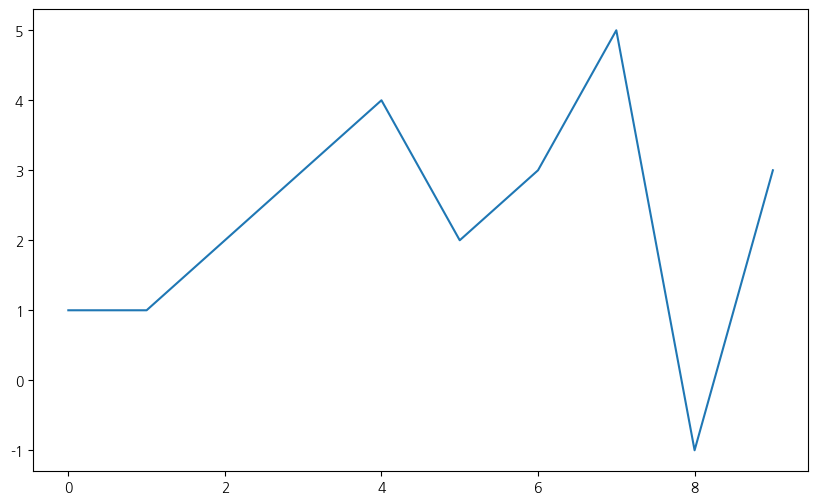

In [96]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 5, -1, 3])
plt.show()

In [97]:
t = np.arange(0, 12, 0.01)
y = np.sin(t)

In [100]:
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.plot(t, y, label="sin")
    plt.plot(t, np.cos(t), label="cos")
    plt.grid()
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Example of simwave")
    plt.show()

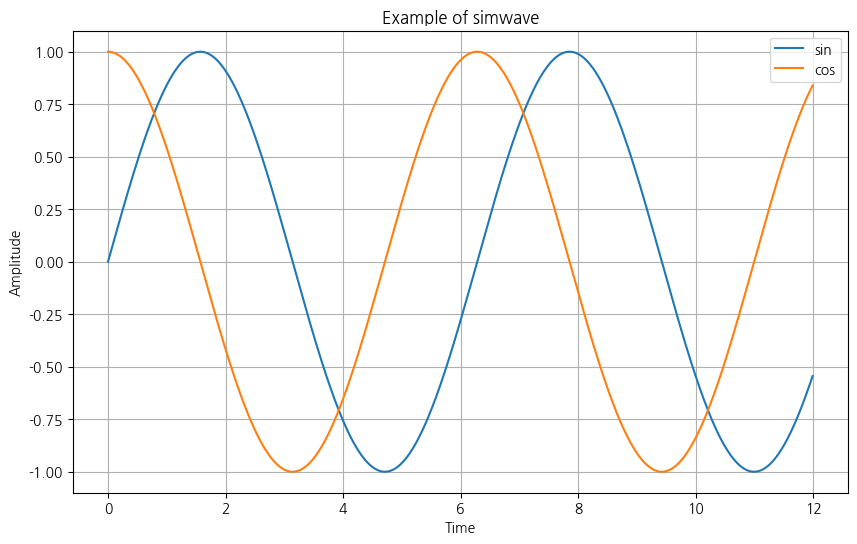

In [101]:
drawGraph()

In [102]:
t = np.arange(0, 5, 0.5)

def drawGraph2():
    plt.figure(figsize=(10, 6))
    plt.plot(t, t, "r--")
    plt.plot(t, t ** 2, "bs")
    plt.plot(t, t ** 3, "g^")
    plt.show()

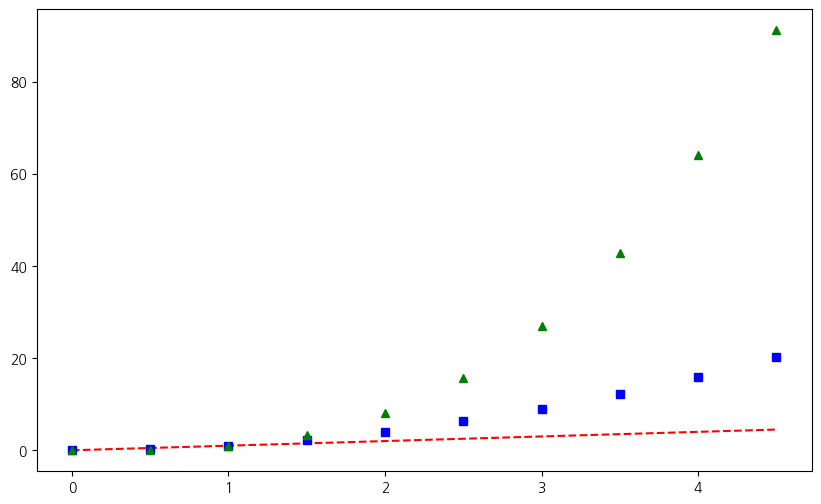

In [103]:
drawGraph2()

## matplotlib 응용

In [106]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]

def drawGraph3():
    plt.figure(figsize=(10, 6))
    plt.plot(t, y, color='green', linestyle="dashed",
             marker="o", markerfacecolor="blue", markersize=12)
    
    plt.xlim([-0.5, 6.5])
    plt.ylim([0.5, 9.5])
    plt.show()

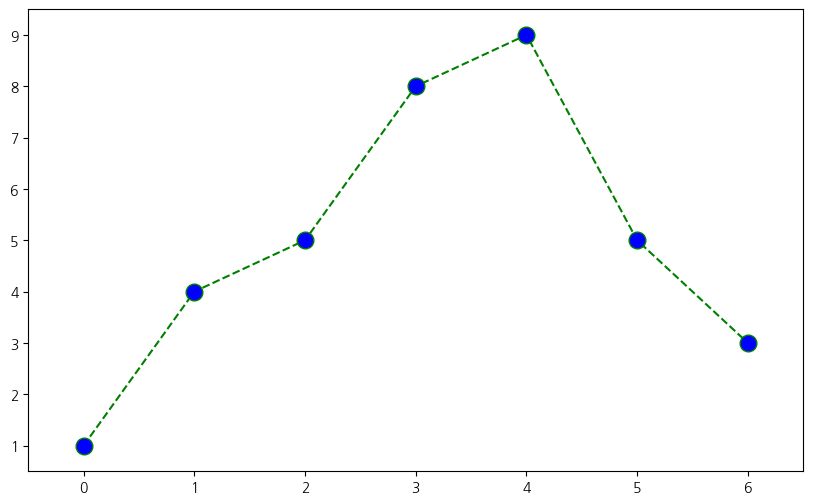

In [107]:
drawGraph3()

In [108]:
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

def drawGraph4():
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y)
    plt.show()

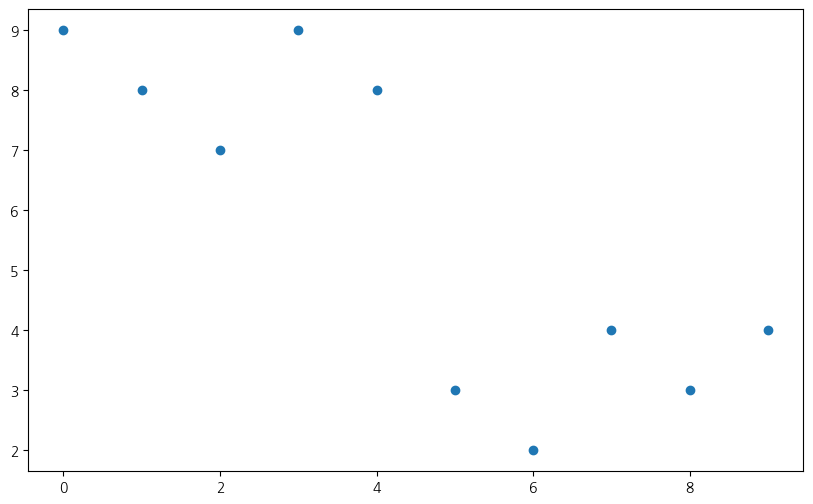

In [109]:
drawGraph4()

In [110]:
colormap = t

def drawGraph5():
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y, s=50, c=colormap, marker=">")
    plt.colorbar()
    plt.show()

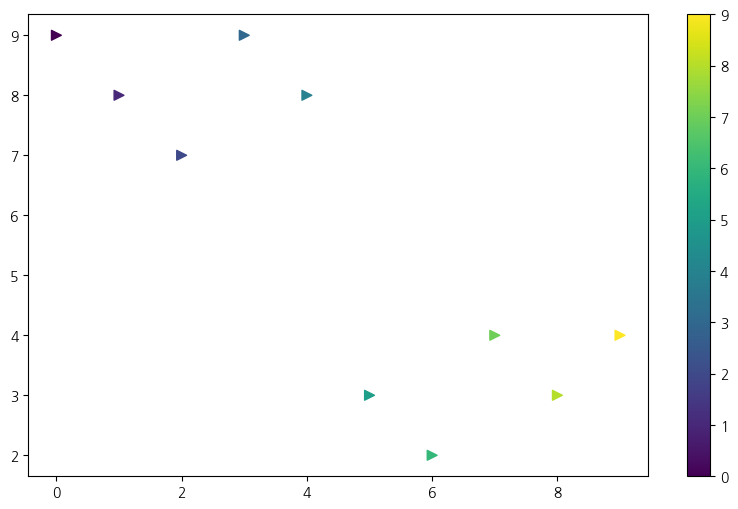

In [111]:
drawGraph5()

## matplotlib 한글 사용

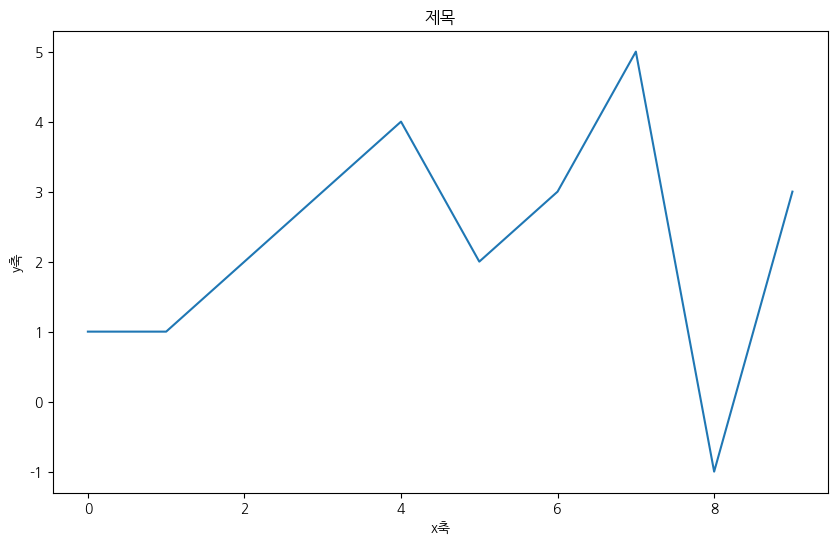

In [112]:
plt.rcParams['font.family'] = "NanumGothic"

plt.figure(figsize=(10, 6))
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 5, -1, 3])
plt.xlabel('x축')
plt.ylabel('y축')
plt.title('제목')
plt.show()

## 데이터 시각화

In [113]:
data_results.head()

,총계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,2031,42.626404,150453,139417,11036,28764,7.335181,19.118263,1.349923
용산구,3258,74.504553,227106,213151,13955,39747,6.144708,17.501519,1.434572
성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349,1.548289
광진구,3828,54.666667,351180,335554,15626,56819,4.449570,16.179452,1.090039
동대문구,3268,52.710280,359873,341149,18724,67030,5.202947,18.626015,0.908098


<Axes: ylabel='구별'>

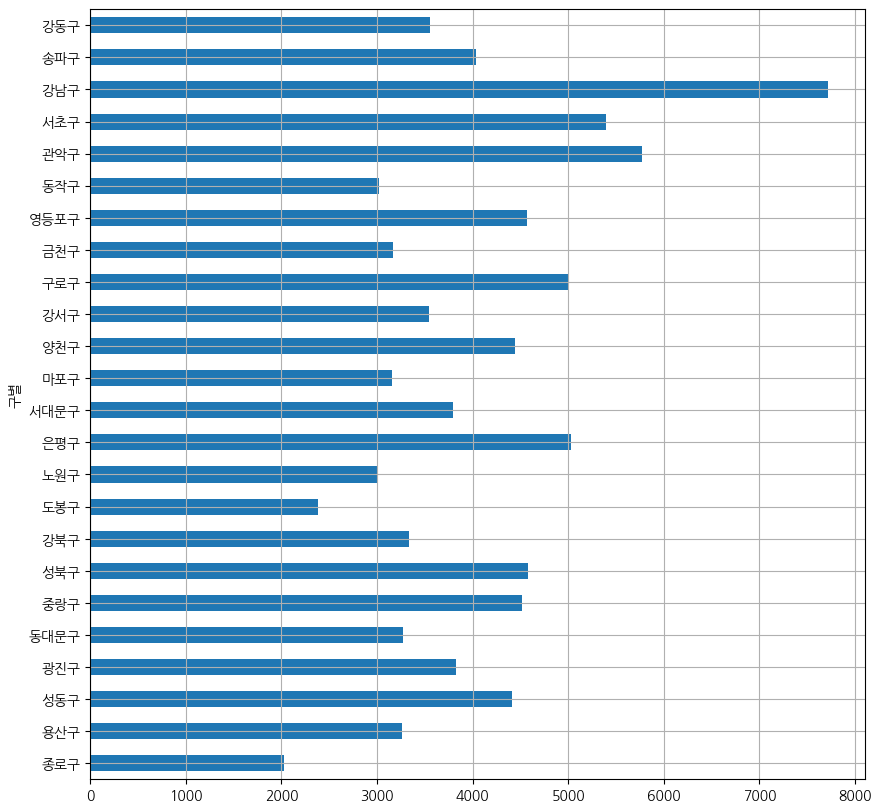

In [114]:
data_results["총계"].plot(kind="barh", grid=True, figsize=(10, 10))

In [115]:
def drawGraph6():
    data_results["총계"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 6)
    )

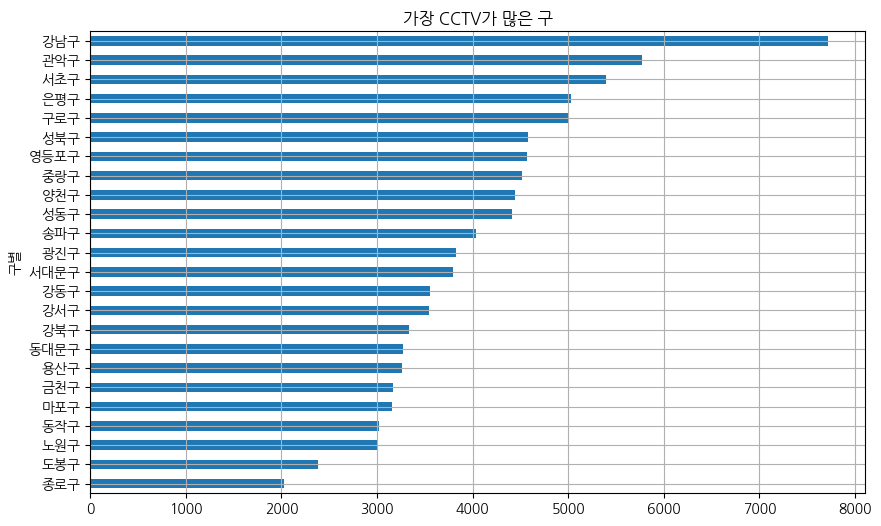

In [116]:
drawGraph6()

## 데이터 경향 분석

In [117]:
def drawGraph7():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_results["인구수"], data_results["총계"], s=50)
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.show()

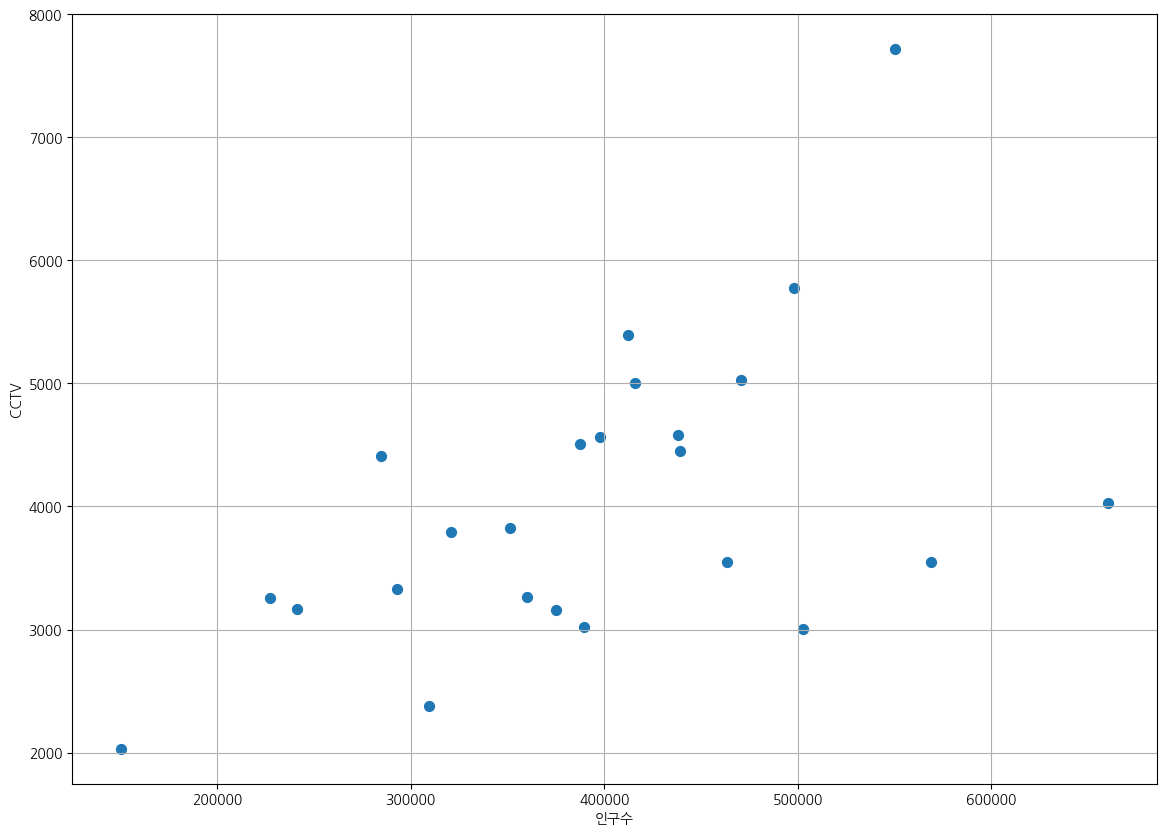

In [118]:
drawGraph7()

In [175]:
from numpy.polynomial import Polynomial

f1 = Polynomial.fit(data_results["인구수"], data_results["총계"], 1)
f1

Polynomial([4082.26259371, 1371.37169494], domain=[150453., 660025.], window=[-1.,  1.], symbol='x')

In [176]:
f1(400000)

np.float64(4054.06396305776)

In [177]:
fx = np.linspace(100000, 700000, 100)

In [178]:
def drawGraph8():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_results["인구수"], data_results["총계"], s=50)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color='g')
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.show()

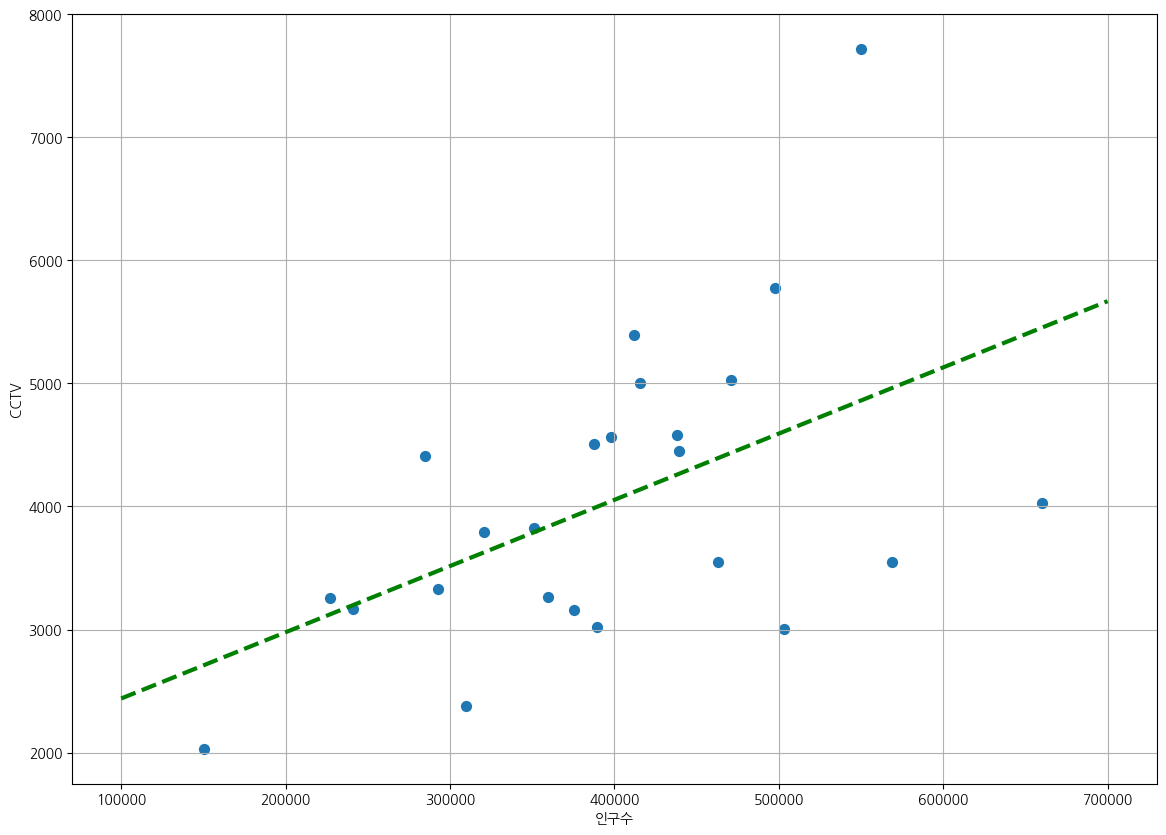

In [179]:
drawGraph8()

In [180]:
data_results["오차"] = data_results["총계"] - f1(data_results["인구수"])

# 경향과 비교해서 데이터의 오차가 큰 데이터를 계산
df_descending = data_results.sort_values(by="오차", ascending=False)
df_ascending = data_results.sort_values(by="오차", ascending=True)

In [181]:
df_ascending.head()

,총계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
노원구,3006,50.676692,502925,498213,4712,96422,0.936919,19.172242,0.597703,-1602.052140
송파구,4031,56.726283,660025,654166,5859,108894,0.887694,16.498466,0.610734,-1422.634289
강서구,3546,64.471243,568826,563058,5768,102096,1.014018,17.948547,0.623389,-1416.760664
도봉구,2378,291.118421,309494,306948,2546,70436,0.822633,22.758438,0.768351,-1188.920373
동작구,3024,36.400541,389714,378769,10945,70474,2.808470,18.083518,0.775954,-974.700131


In [182]:
df_descending.head()

,총계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,7721,24.894856,550282,544873,5409,86606,0.982951,15.738476,1.403099,2858.051400
서초구,5395,54.363376,412078,407664,4414,65661,1.071156,15.934119,1.309218,1275.926863
관악구,5772,29.446064,497883,481956,15927,85418,3.198944,17.156240,1.159309,1191.086149
성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349,1.548289,975.176733
구로구,5003,42.902028,415651,392405,23246,79984,5.592673,19.243067,1.203654,864.695386


In [198]:
from matplotlib.colors import ListedColormap

# colormap 사용자 정의
color_step = ["#e74c3c", "#f7a100", "#95a5a6", "#2ecc71", "#3498db"]
my_colormap = ListedColormap(color_step)

In [203]:
def drawGraph9():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_results["인구수"], data_results["총계"], c=data_results["오차"], 
                s=50, cmap=my_colormap)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color='gray')

    for n in range(5):
        plt.text(df_descending["인구수"].iloc[n] * 1.02,
                 df_descending["총계"].iloc[n] * 0.98,
                 df_descending.index[n], fontsize=15)
        
        plt.text(df_ascending["인구수"].iloc[n] * 1.02,
                 df_ascending["총계"].iloc[n] * 0.98,
                 df_ascending.index[n], fontsize=15)
        
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.colorbar()
    plt.grid()
    plt.savefig("../data/01.CCTV_Population_Graph.png")
    plt.show()

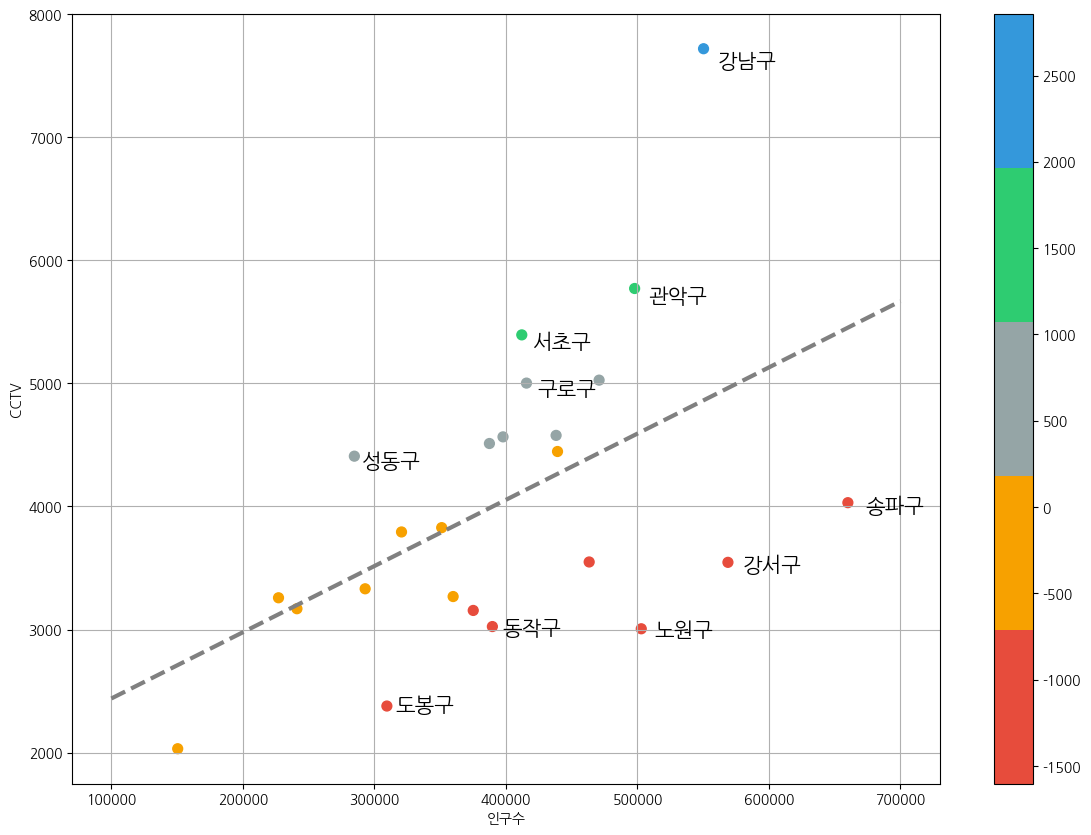

In [204]:
drawGraph9()

In [173]:
data_results.to_csv("../data/01.CCTV_result.csv", sep=",", encoding="utf-8")

In [174]:
%ls ../data/

 01.CCTV_result.csv  '01. Seoul_CCTV.csv'  '01. Seoul_Population.xlsx'
